# 準備

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

torch.manual_seed(1)

In [2]:
transform = transforms.Compose([transforms.ToTensor(), lambda x: x.view(-1)])

root = './data'
mnist_train = datasets.MNIST(root=root,download=True,train=True,transform=transform)
train_dataloader = DataLoader(mnist_train,batch_size=100,shuffle=True)

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# ネットワークの定義

In [3]:
class AE(nn.Module):
    def __init__(self, device='cpu'):
        super().__init__()
        self.device = device
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 784)

    def forward(self, x):
        h = self.l1(x)
        h = torch.relu(h)

        h = self.l2(h)
        y = torch.sigmoid(h)

        return y

In [5]:
model = AE(device=device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# 学習の実行

In [6]:
epochs = 10
for epoch in range(epochs):
    train_loss = 0.
    for (x, _) in train_dataloader:
        x = x.to(device)
        model.train()
        
        x_fake = model(x)
        loss = criterion(x_fake, x)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    train_loss /= len(train_dataloader)
    
    print('Epoch: {}, Loss: {:.3f}'.format(epoch+1, train_loss))

Epoch: 1, Loss: 0.145
Epoch: 2, Loss: 0.082
Epoch: 3, Loss: 0.073
Epoch: 4, Loss: 0.069
Epoch: 5, Loss: 0.068
Epoch: 6, Loss: 0.067
Epoch: 7, Loss: 0.066
Epoch: 8, Loss: 0.066
Epoch: 9, Loss: 0.066
Epoch: 10, Loss: 0.065


# 画像の復元

(-0.5, 27.5, 27.5, -0.5)

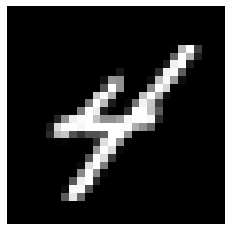

In [7]:
x, t = next(iter(train_dataloader))
real_image = x[0,].view(28,28).detach().numpy()
plt.imshow(real_image,cmap='binary_r')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

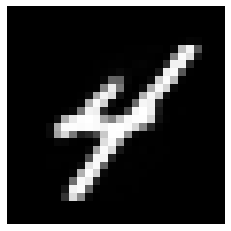

In [8]:
model.eval()
x = x.to(device)
fake_image = model(x)[0,].view(28,28).detach().numpy()
plt.imshow(fake_image,cmap='binary_r')
plt.axis('off')